# Análise exploratória de dados

In [2]:
import pandas as pd

In [25]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura do conjunto de dados

In [26]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 2. Descrição de dados

![carro](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Ford_Pinto.jpg/280px-Ford_Pinto.jpg)
![vei](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/1976_AMC_Hornet_Sportabout.jpg/280px-1976_AMC_Hornet_Sportabout.jpg)
![car](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Fiat_131_S_Mirafiori_1600.jpg/280px-Fiat_131_S_Mirafiori_1600.jpg)
![carros](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/1994_Audi_100_E_2.0_Front.jpg/280px-1994_Audi_100_E_2.0_Front.jpg)

Um conjunto de dados para carros e seus preços e recursos associados; fabricado entre 1970-82 nos EUA, Europa e Japão. Este conjunto de dados foi retirado da biblioteca StatLib que é
mantido na Carnegie Mellon University.

## Dicionário de dados

In [27]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,mpg,representa uma medida de eficiencia de combust...,Numerico,Continuo
1,cylinders,"representa uma contagem de cilindros, um valor...",Numerico,Discreto
2,displacement,"representa o volume do motor, uma medida contínua",Numerico,Continuo
3,horsepower,"representa a potência do motor, uma medida con...",Numerico,Continuo
4,weight,"representa o peso do carro, uma medida contínua",Numerico,Continuo
5,acceleration,"representa o tempo de aceleração do carro, uma...",Numerico,Continuo
6,model_year,"Representa o ano do modelo do carro, um valor ...",Numerico,Discreto
7,origin,"representa a origem do carro, uma categoria se...",Categorico,Nominal
8,name,"representa o nome completo do carro, uma categ...",Categorico,Nominal


## 3. Perguntas de partida e hipóteses

1- Existem dados faltantes, se sim quantos e em quais variáveis?

2- Qual a distribuição dos dados (variável por variável)?

3- Relação entre o peso do carro e sua eficiência de combustível.

4- Existe uma correlação entre o peso do carro e o tempo de aceleração? 

5- Relação entre a potência do motor e país de origem do carro.

### Existem dados faltantes, se sim quantos e em quais variáveis?

In [28]:
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes. Além disso sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    "As próximas análises aqui serão realizadas sem considerar os dados faltantes"
    "\n\n ---"
))

df.dropna(inplace=True)

horsepower    6
dtype: int64

---
A partir dessa informação sabemos que as variáveis `['horsepower']`contém valores faltantes. Além disso sabemos que temos `6` linhas com valores faltantes.As próximas análises aqui serão realizadas sem considerar os dados faltantes

 ---

### Qual a distribuição dos dados (variável por variável)?

In [21]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,amc matador
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,NaN,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,NaN,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,NaN,NaN


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


### Relação entre o peso do carro e sua eficiência de combustível

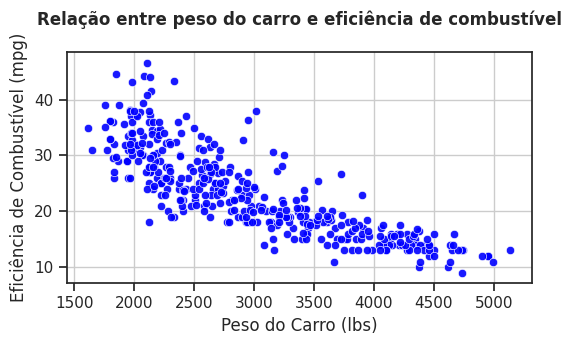

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'weight' in df.columns and 'mpg' in df.columns and df[['weight', 'mpg']].isnull().sum().sum() == 0:
    plt.figure(figsize=(6, 3))
    plt.title('Relação entre peso do carro e eficiência de combustível', fontweight='bold', pad=20)
    
    sns.scatterplot(data=df, x='weight', y='mpg', color='blue', alpha=0.9)
    
    plt.xlabel('Peso do Carro (lbs)')
    plt.ylabel('Eficiência de Combustível (mpg)')
    plt.grid(True)
    plt.show()

### Existe uma correlação entre o peso do carro e o tempo de aceleração? 

A correlação entre o peso do carro e o tempo de aceleração é: -0.42


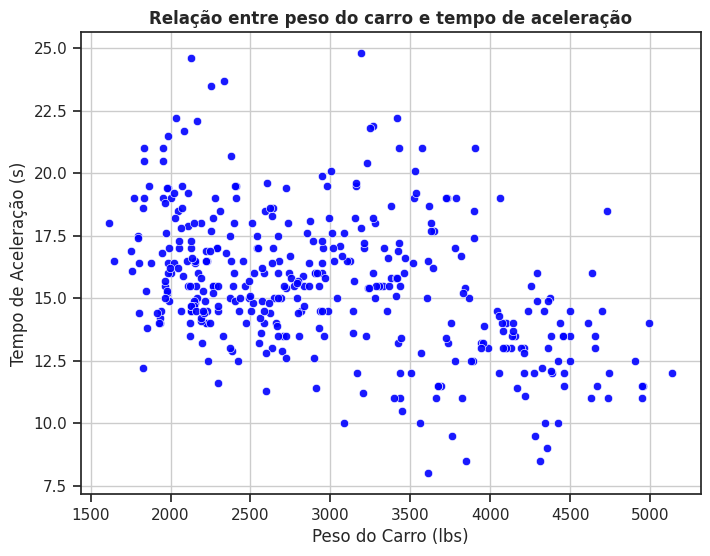

In [17]:
if 'weight' in df.columns and 'acceleration' in df.columns and df[['weight', 'acceleration']].isnull().sum().sum() == 0:
    
    correlation = df['weight'].corr(df['acceleration'])
    print(f'A correlação entre o peso do carro e o tempo de aceleração é: {correlation:.2f}')
    
    
    plt.figure(figsize=(8, 6))
    plt.title('Relação entre peso do carro e tempo de aceleração', fontweight='bold')
    
    sns.scatterplot(data=df, x='weight', y='acceleration', color='blue', alpha=0.9)
    
    plt.xlabel('Peso do Carro (lbs)')
    plt.ylabel('Tempo de Aceleração (s)')
    plt.grid(True)
    plt.show()

In [30]:
df_selected = df[['weight', 'acceleration']]


print(df_selected)

     weight  acceleration
0      3504          12.0
1      3693          11.5
2      3436          11.0
3      3433          12.0
4      3449          10.5
..      ...           ...
393    2790          15.6
394    2130          24.6
395    2295          11.6
396    2625          18.6
397    2720          19.4

[392 rows x 2 columns]


### Relação entre a potência do motor e seu país de origem.

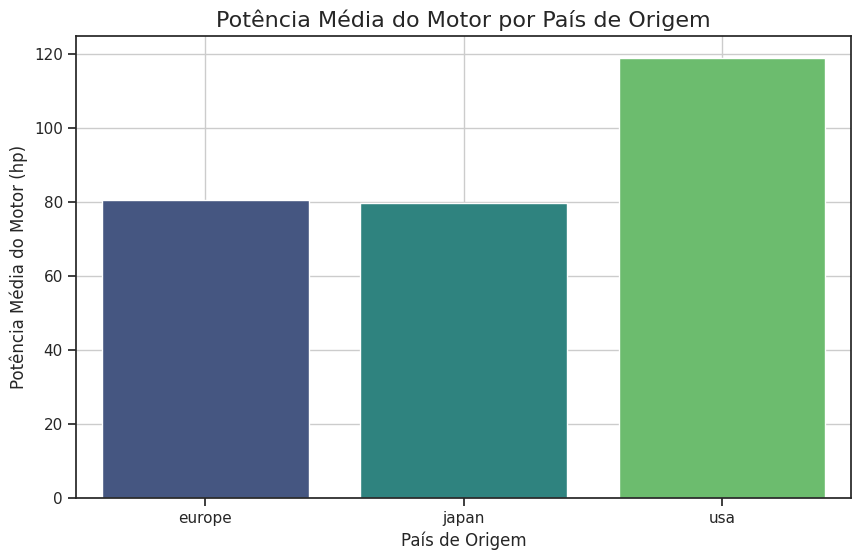

In [35]:
mean_horsepower = df.groupby('origin')['horsepower'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='origin', y='horsepower', data=mean_horsepower, palette='viridis')

plt.title('Potência Média do Motor por País de Origem', fontsize=16)
plt.xlabel('País de Origem', fontsize=12)
plt.ylabel('Potência Média do Motor (hp)', fontsize=12)
plt.grid(True)

plt.show()

In [37]:
df_selected = df[['origin', 'horsepower']]


print(df_selected)

     origin  horsepower
0       usa       130.0
1       usa       165.0
2       usa       150.0
3       usa       150.0
4       usa       140.0
..      ...         ...
393     usa        86.0
394  europe        52.0
395     usa        84.0
396     usa        79.0
397     usa        82.0

[392 rows x 2 columns]


## 3- Insights

Carros mais pesados tendem a ter menor eficiência de combustível.
A relação entre peso e aceleração não é linear e pode ser afetada por várias outras características do veículo
O tempo médio de aceleração dos carros é de 15,5.
O país com mais carros de origem é os Estados Unidos.
O motor de carros com origem dos Estados Unidos tem maior potência.
